In [1]:
!pip install aguaclara

     |████████████████████████████████| 92kB 2.4MB/s 
     |████████████████████████████████| 163kB 8.5MB/s 
  Created wheel for aguaclara: filename=aguaclara-0.2.1-cp36-none-any.whl size=99466 sha256=38e1dde0cf6774a2aebf87a551816c8b3a2eceb8e5310bc20fc5e232dc5b7a2f
  Stored in directory: /root/.cache/pip/wheels/7f/ff/4f/10d76e6a261d392aefbdf6ce8d3d5519e924dc334b102ca49b
  Created wheel for pint: filename=Pint-0.8.1-py2.py3-none-any.whl size=134156 sha256=31529517002912355069191e902e865203519003f3e26b798ee963e6a1e20737
  Stored in directory: /root/.cache/pip/wheels/b4/56/36/7c4d6a4e3660e233b95e3b0482551915cb184abca0f93ee1dd
Successfully built aguaclara pint


In [0]:
import aguaclara as ac
from aguaclara.core.units import unit_registry as u
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

$$ v_c = 2.41 v_o \sqrt{\frac{w_0}{x}}$$

The minimum distance s that this equation makes sense is where $v_o$ = $v_c$.

$$ 1 = 2.41^2 \frac{w_0}{x_{min}}$$

$$ x_{min} =  2.41^2 w_0$$

The distance over which the velocity is reduced by a factor of 2 is:

$$ 0.5 = 2.41  \sqrt{\frac{w_0}{x}}$$

$$ x_{0.5v} =  4 * 2.41^2 w_0 = 23w_0$$
$$ x_{0.25v} =  16 * 2.41^2 w_0 = 96w_0$$



266.7 millimeter / second
23.232400000000002
the half velocity distance is 371.7 millimeter


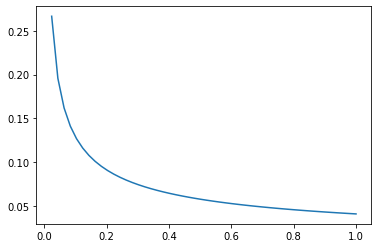

In [3]:
Sed_w = 42 * u.inch
Jet_w = 4 * u.mm
Sed_v_up = 1 * u.mm/u.s 
Sed_v_jet = (Sed_v_up * Sed_w/Jet_w).to(u.mm/u.s)
print(Sed_v_jet)

def v_jet(v_0,w_0,x):
  return (2.41 * v_0 * np.sqrt(w_0/x)).to(u.m/u.s)

xhalfv = (2.41*4)**2 * Jet_w
print((2.41*2)**2)
print('the half velocity distance is',xhalfv)
min_x = (2.41**2 * Jet_w).to(u.m)

xrange = np.linspace(min_x.magnitude,1,50) * u.m 
plt.plot(xrange,v_jet(Sed_v_jet,Jet_w,xrange))


In [0]:
Q=100 * u.L/u.s
Q_ratio = 0.85


Analyze Casey's jet experiments
Flocculator diameter

First figure out what the flow rate was
Then figure out what the inlet tube diameter was for the maximum recommended velocity.
Use current equations to estimate what that EDR_max is.
Turn that maximum EDR into a guideline for our designs.


In [19]:
S_jet = 12.7 * u.mm
D_jet = np.linspace(2,11.7,50) * u.mm
D_jet_min = 2 * u.mm
V_jet_max = 1.9 * u.m/u.s
A_jet_min = ac.area_circle(D_jet_min)
Q_12est = (V_jet_max*A_jet_min).to(u.mL/u.s)
# print('Flow rate for 1.6 mm/s upflow',Q_16)
# Q_12est = Q_16/1.6*1.2
print('Flow rate for 1.2 mm/s upflow based on maximum jet velocity',Q_12est)
#check Re in flocculator
temp = 20 * u.degC
Re_12 = 815
D_floc = 9.5 * u.mm
v_floc = Re_12 * ac.viscosity_kinematic_water(temp)/D_floc
Q_floc_12 = (v_floc * ac.area_circle(D_floc)).to(u.mL/u.s)
print('Flow rate for 1.2 mm/s upflow',Q_floc_12)
# Use the average of the two flow rate estimates
Q_12 = (Q_12est +  Q_floc_12)/2
print('Flow rate for 1.2 mm/s upflow',Q_12)


v_ratio = 1.9/0.06
print('velocity ratio',v_ratio)
A_ratio = (11.7/2)**2
print('area ratio',A_ratio)

Flow rate for 1.2 mm/s upflow based on maximum jet velocity 5.969 milliliter / second
Flow rate for 1.2 mm/s upflow 6.103 milliliter / second
Flow rate for 1.2 mm/s upflow 6.036 milliliter / second
velocity ratio 31.666666666666668
area ratio 34.2225


$$A_{PlaneJet} = S_{Tank}W_{Jet} = \frac{\pi}{4}D_{Jet}^2$$
$$ \epsilon_{Jet} = \frac{(\Pi_{Jet}V_{Jet})^3}{W_{Jet}}$$
Solve for $D_{Jet}$
$$W_{Jet} = \frac{\pi D_{Jet}^2}{4S_{Tank}}$$
$$V_{Jet} = \frac{Q}{\frac{\pi}{4}D_{Jet}^2}$$

$$ \epsilon_{Jet} = \frac{(\Pi_{Jet}\frac{Q}{\frac{\pi}{4}D_{Jet}^2})^3}{\frac{\pi D_{Jet}^2}{4S_{Tank}}}$$

$$ \epsilon_{Jet} = \frac{(\Pi_{Jet}\frac{Q}{\frac{\pi}{4}D_{Jet}^2})^3}{\frac{\pi D_{Jet}^2}{4S_{Tank}}}$$


In [0]:

EDR_Casey = 300 * u.mW/u.kg
Pi_jet_Plane_Casey = 0.23
 